# **Taller 01 (Cálculo de raíces)** 
 ### Sebastian Oña
 ## **Ejercicio 01**
### Encuentre todas las raíces del polinomio  $x^{4} + 540x^{3} + 109124x^{2} + 9781632x + 328188672 = 0$.




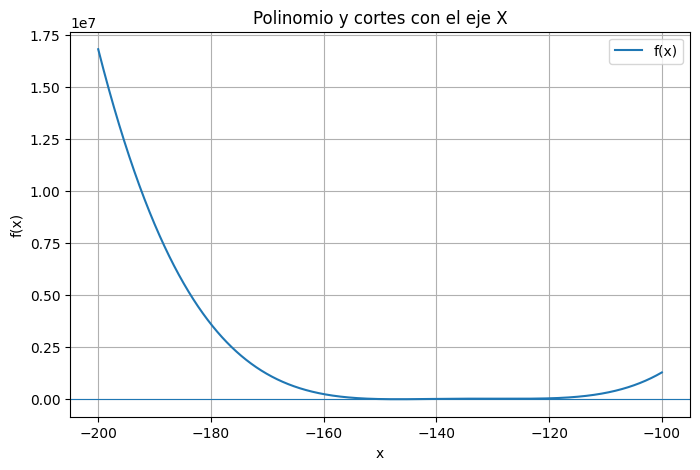

Intervalos con cambio de signo (para Bisección):
[-152.000, -152.000]
[-136.000, -136.000]
[-126.000, -126.000]

Raíces reales con Bisección:
-152.000000000000
-136.000000000000
-126.000000000000

Raíces reales con Newton:
-151.999999999994
-136.000000000064


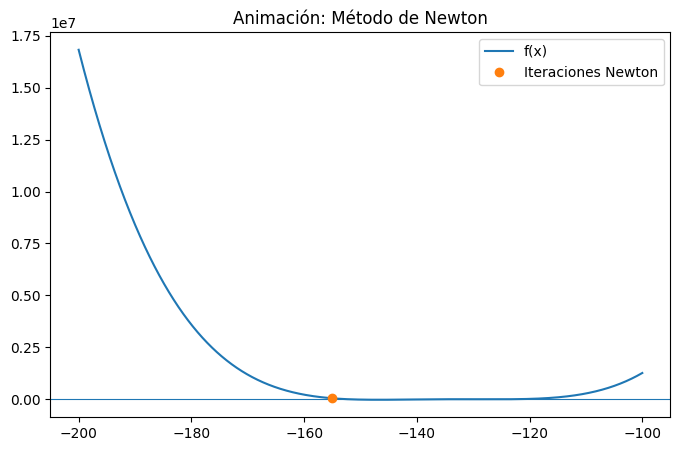

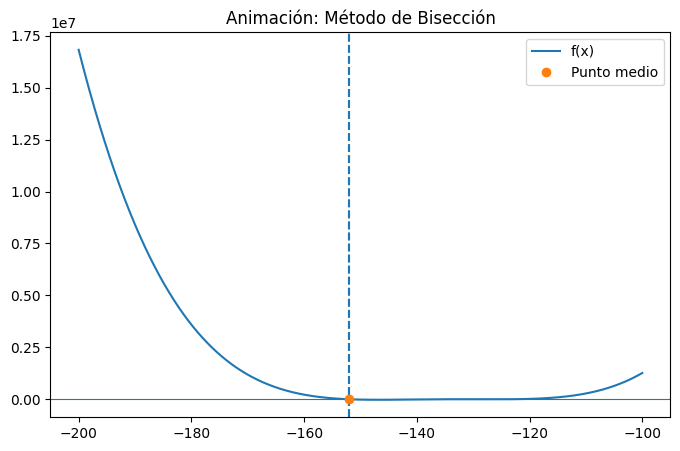

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
import matplotlib.animation as animation

# Polinomio y derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def fprime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

# Grafica
xx = np.linspace(-200, -100, 2000)   # zona donde están las raíces reales
yy = f(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="f(x)")
plt.axhline(0, linewidth=0.8)
plt.grid(True)
plt.title("Polinomio y cortes con el eje X")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend()
plt.show()

# Bracketing automático para Bisección 
def brackets(f, a, b, n=500):
    xs = np.linspace(a, b, n+1)
    out = []
    for i in range(n):
        x0, x1 = xs[i], xs[i+1]
        y0, y1 = f(x0), f(x1)
        if y0 == 0:
            out.append((x0, x0))
        elif y0 * y1 < 0:
            out.append((x0, x1))
    return out

# Buscar cambios de signo en una región razonable
candidatos = brackets(f, -200, -100, n=1000)
print("Intervalos con cambio de signo (para Bisección):")
for a,b in candidatos:
    print(f"[{a:.3f}, {b:.3f}]")

# Aplicar Bisección en cada intervalo
raices_bisec = []
for a,b in candidatos:
    if a == b:  # cayó justo en raíz
        r = a
    else:
        r = bisect(f, a, b, xtol=1e-12, rtol=1e-12, maxiter=200)
    raices_bisec.append(r)

print("\nRaíces reales con Bisección:")
for r in raices_bisec:
    print(f"{r:.12f}")

# Newton
# Semillas cerca de los brackets o inspección gráfica
semillas_newton = [-155.0, -138.0]  # apuntan a las dos raíces reales (~ -152 y ~ -136)
raices_newton = []
for x0 in semillas_newton:
    r = newton(f, x0=x0, fprime=fprime, tol=1e-12, maxiter=100)
    raices_newton.append(r)

print("\nRaíces reales con Newton:")
for r in raices_newton:
    print(f"{r:.12f}")

# Animación Newton
x0 = -155.0
tray_x = [x0]
for _ in range(6):
    x0 = x0 - f(x0)/fprime(x0)
    tray_x.append(x0)
tray_y = [f(x) for x in tray_x]

figN, axN = plt.subplots(figsize=(8,5))
axN.plot(xx, yy, label="f(x)")
axN.axhline(0, linewidth=0.8)
pN, = axN.plot([], [], "o", label="Iteraciones Newton")
axN.legend()
axN.set_title("Animación: Método de Newton")

def updN(i):
    pN.set_data(tray_x[:i+1], tray_y[:i+1])
    return pN,

aniN = animation.FuncAnimation(figN, updN, frames=len(tray_x), interval=800, blit=True, repeat=False)
plt.show()

# Animación Bisección
# Tomamos el primer intervalo con cambio de signo
a, b = candidatos[0]
figB, axB = plt.subplots(figsize=(8,5))
axB.plot(xx, yy, label="f(x)")
axB.axhline(0, linewidth=0.8)
vA = axB.axvline(a, linestyle="--")
vB = axB.axvline(b, linestyle="--")
pM, = axB.plot([], [], "o", label="Punto medio")
axB.legend()
axB.set_title("Animación: Método de Bisección")

# Generar iteraciones manuales de bisección para animar
its_a, its_b, mids = [a], [b], []
for _ in range(12):
    m = 0.5*(a+b)
    mids.append(m)
    if f(a)*f(m) <= 0:
        b = m
    else:
        a = m
    its_a.append(a); its_b.append(b)

def updB(i):
    vA.set_xdata([its_a[i], its_a[i]])
    vB.set_xdata([its_b[i], its_b[i]])
    if i < len(mids):
        pM.set_data([mids[i]], [f(mids[i])])
    return vA, vB, pM

aniB = animation.FuncAnimation(figB, updB, frames=len(its_a), interval=800, blit=True, repeat=False)
plt.show()


## 2. Encuentre todos los puntos en los que la curva $\left(\frac{y}{2}\right)^2 = \left(\frac{x + 3}{2}\right)^2 - 1$ interseca en el eje $y = -2$


Intersecciones (Bisección):
  x1 = -5.828427124748, punto = (-5.828427124748, -2)
  x2 = -0.171572875254, punto = (-0.171572875254, -2)

Intersecciones (Newton):
  x1 = -5.828427124746, punto = (-5.828427124746, -2)
  x2 = -0.171572875254, punto = (-0.171572875254, -2)


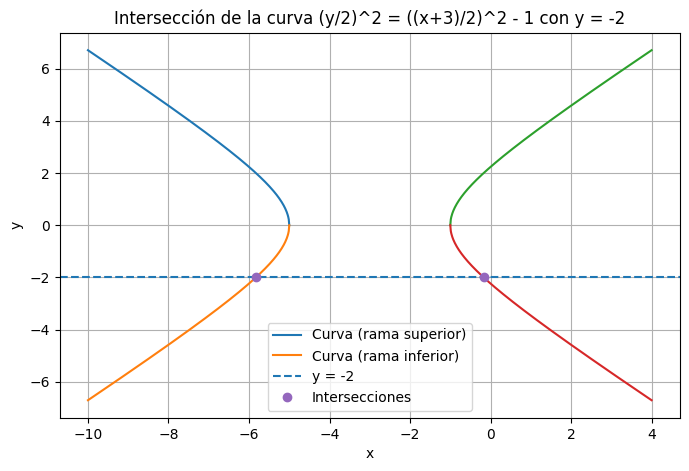

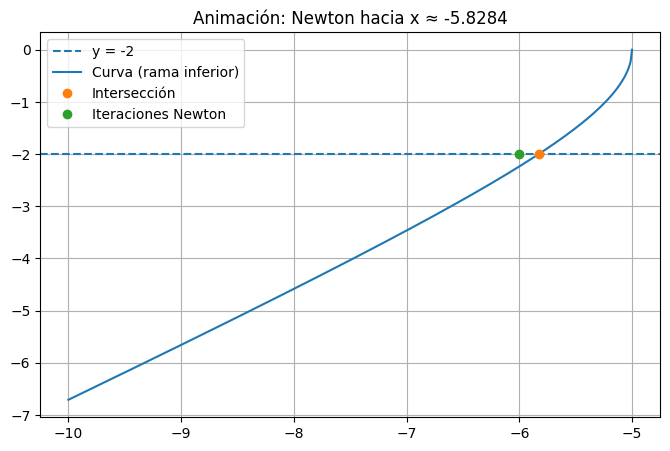

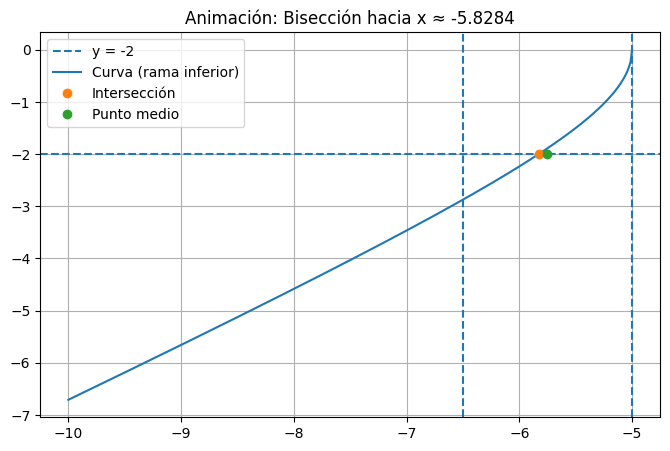

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
import matplotlib.animation as animation


def h(x):
    return (x+3)**2/4 - 2

def dh(x):
    return (x+3)/2


a1, b1 = -6.5, -5.0    
a2, b2 = -1.0,  0.5    

x_b1 = bisect(h, a1, b1, xtol=1e-12, rtol=1e-12, maxiter=200)
x_b2 = bisect(h, a2, b2, xtol=1e-12, rtol=1e-12, maxiter=200)

# Newton con semillas razonables
x_n1 = newton(h, x0=-6.0, fprime=dh, tol=1e-12, maxiter=100)
x_n2 = newton(h, x0=-0.5, fprime=dh, tol=1e-12, maxiter=100)

print("Intersecciones (Bisección):")
print(f"  x1 = {x_b1:.12f}, punto = ({x_b1:.12f}, -2)")
print(f"  x2 = {x_b2:.12f}, punto = ({x_b2:.12f}, -2)")

print("\nIntersecciones (Newton):")
print(f"  x1 = {x_n1:.12f}, punto = ({x_n1:.12f}, -2)")
print(f"  x2 = {x_n2:.12f}, punto = ({x_n2:.12f}, -2)")


xs1 = np.linspace(-10, -3-2, 400)  
xs2 = np.linspace(-3+2, 4, 400)   

def y_branch(x):
    return 2*np.sqrt(((x+3)/2)**2 - 1)

plt.figure(figsize=(8,5))

plt.plot(xs1,  y_branch(xs1),  label="Curva (rama superior)")
plt.plot(xs1, -y_branch(xs1),  label="Curva (rama inferior)")
plt.plot(xs2,  y_branch(xs2))
plt.plot(xs2, -y_branch(xs2))

plt.axhline(-2, linestyle="--", label="y = -2")

plt.plot([x_b1, x_b2], [-2, -2], "o", label="Intersecciones")

plt.title("Intersección de la curva (y/2)^2 = ((x+3)/2)^2 - 1 con y = -2")
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True); plt.legend()
plt.show()


x0 = -6.0
tray_x = [x0]
for _ in range(6):
    x0 = x0 - h(x0)/dh(x0)
    tray_x.append(x0)

figN, axN = plt.subplots(figsize=(8,5))
axN.axhline(-2, linestyle="--", label="y = -2")
axN.plot(xs1, -y_branch(xs1), label="Curva (rama inferior)")
axN.plot([x_b1], [-2], "o", label="Intersección")
pN, = axN.plot([], [], "o", label="Iteraciones Newton")
axN.set_title("Animación: Newton hacia x ≈ -5.8284")
axN.grid(True); axN.legend()

def updN(i):
    pN.set_data([tray_x[i]], [-2])
    return pN,

aniN = animation.FuncAnimation(figN, updN, frames=len(tray_x), interval=700, blit=True, repeat=False)
plt.show()


a, b = a1, b1
its_a, its_b, mids = [a], [b], []
for _ in range(12):
    m = 0.5*(a+b)
    mids.append(m)
    if h(a)*h(m) <= 0:
        b = m
    else:
        a = m
    its_a.append(a); its_b.append(b)

figB, axB = plt.subplots(figsize=(8,5))
axB.axhline(-2, linestyle="--", label="y = -2")
axB.plot(xs1, -y_branch(xs1), label="Curva (rama inferior)")
axB.plot([x_b1], [-2], "o", label="Intersección")
vA = axB.axvline(its_a[0], linestyle="--")
vB = axB.axvline(its_b[0], linestyle="--")
pM, = axB.plot([], [], "o", label="Punto medio")
axB.set_title("Animación: Bisección hacia x ≈ -5.8284")
axB.grid(True); axB.legend()

def updB(i):
    vA.set_xdata([its_a[i], its_a[i]])
    vB.set_xdata([its_b[i], its_b[i]])
    if i < len(mids):
        pM.set_data([mids[i]], [-2])
    return vA, vB, pM

aniB = animation.FuncAnimation(figB, updB, frames=len(its_a), interval=700, blit=True, repeat=False)
plt.show()


## Dada la función $ f(x) = \left(\frac{sen(x)}{x}\right) $  ¿A partir de qué valor $x_T$ se cumple que $f(x) < 0.015, \quad \forall x \ge x_T$

x_T ≈ 70.6714
f(x_T) = 0.014149


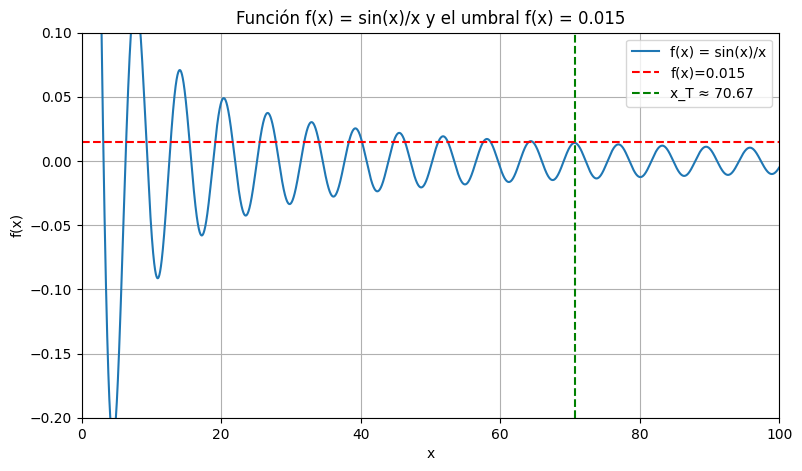

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.optimize import brentq


def f(x):
    return np.sin(x)/x


x = np.linspace(0.1, 200, 100000)
y = f(x)


idx_max = argrelextrema(y, np.greater)[0]
x_max = x[idx_max]
y_max = y[idx_max]


for xm, ym in zip(x_max, y_max):
    if ym < 0.015:
        x_T = xm
        break

print(f"x_T ≈ {x_T:.4f}")
print(f"f(x_T) = {f(x_T):.6f}")


plt.figure(figsize=(9,5))
plt.plot(x, y, label="f(x) = sin(x)/x")
plt.axhline(0.015, color='r', linestyle='--', label="f(x)=0.015")
plt.axvline(x_T, color='g', linestyle='--', label=f"x_T ≈ {x_T:.2f}")
plt.xlim(0, 100)
plt.ylim(-0.2, 0.1)
plt.title("Función f(x) = sin(x)/x y el umbral f(x) = 0.015")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend(); plt.grid(True)
plt.show()
